In [2]:
#coding=utf-8
#import
import os
import gensim
import logging
import json
import numpy as np
import time
from sklearn.cluster import KMeans


In [3]:
#讀取Word2Vec模型
with open('./data/subject.json' , 'r') as f:
    subjectDic = json.load(f)
print '主題詞字典的長度',len(subjectDic)
model = gensim.models.Word2Vec.load('./data/Word2Vec_sz_200_mc_1_sg_by_sentence')

主題詞字典的長度 72838


In [4]:
#Def
def PrintKeyValue(dic_in):
    for key, value in dic_in.iteritems() :
        print key,'  :  ', value
def jsonDump(dataIn):
    print json.dumps(dataIn,ensure_ascii=False).encode('utf-8')
    
# 創立資料夾
def mkdir(path):
    if  os.path.exists(path)==False:
        os.makedirs(path)
        print '呼叫mkdir，創立資料夾:',path     

### 抓主題詞測試程式碼

In [4]:
print json.dumps(subjectDic.values()[3],ensure_ascii=False).encode('utf-8')

{"negativeSubject": [["米心", "偏硬"], ["用量", "偏酸"], ["香濃", "醇厚"], ["遜色", "香濃"]], "author_id": "54ddafec2756dd76b8e10cd5", "score": 105, "positiveSubject": [["台灣", "空間"], ["南歐", "道地"], ["佳餚", "健康"], ["製作", "美味"], ["烤蒜頭", "甜味"], ["沒有", "咬勁"], ["瘦肉", "特別"], ["藝術品", "美食"], ["圖案", "美麗"], ["甜菜根", "有質感"], ["nt600", "精緻"], ["感官", "銷魂"], ["麵包", "意猶未盡"], ["香味", "美妙"], ["著蝦", "香味"], ["上欖", "很棒"], ["表面", "口感"], ["口感", "外酥內軟"], ["軟法", "不膩口"], ["橄油", "濕潤"], ["西班牙", "香氣四溢"], ["滋味", "多層次"], ["辣味", "滋味"], ["中和", "甜味"], ["味道", "口感"], ["天使", "驚喜"], ["麵食", "有特色"], ["肋排", "香"], ["醬汁", "咬勁"], ["香米", "口感"], ["義大利", "口感"], ["米粒", "香"], ["大蒜", "濕潤"], ["蔬菜", "新奇"], ["令人", "滋味"], ["堅果", "香脆"], ["果乾", "柔軟"], ["菠菜", "特別"], ["熱菜", "豐富"], ["莎莎醬", "滋味"], ["加點", "開胃"], ["糯米", "停不下來"], ["甜味", "滋味"], ["地瓜", "甜美"], ["零嘴", "香脆"], ["番薯", "開胃"], ["下酒菜", "喜歡"], ["風味", "品嚐"], ["微酸", "酒香"], ["酒香", "香氣"], ["沙拉", "甘甜"], ["甘甜", "新鮮"], ["新鮮", "沒話說"], ["海鮮總匯", "奢華"], ["奇異果", "自然"], ["偏酸", "很實在"], ["質地", "濃稠"], ["nt150", "不貴"], ["果汁", 

In [18]:
subjectList = []
for dic in subjectDic.values()[3:4]:
    for list1 in dic['positiveSubject']:
        if list1[0] not in subjectList:
            subjectList.append(list1[0])
    for list2 in dic['negativeSubject']:
        if list2[0] not in subjectList:
            subjectList.append(list2[0])

            
jsonDump(subjectList)

["台灣", "南歐", "佳餚", "製作", "烤蒜頭", "沒有", "瘦肉", "藝術品", "圖案", "甜菜根", "nt600", "感官", "麵包", "香味", "著蝦", "上欖", "表面", "口感", "軟法", "橄油", "西班牙", "滋味", "辣味", "中和", "味道", "天使", "麵食", "肋排", "醬汁", "香米", "義大利", "米粒", "大蒜", "蔬菜", "令人", "堅果", "果乾", "菠菜", "熱菜", "莎莎醬", "加點", "糯米", "甜味", "地瓜", "零嘴", "番薯", "下酒菜", "風味", "微酸", "酒香", "沙拉", "甘甜", "新鮮", "海鮮總匯", "奇異果", "偏酸", "質地", "nt150", "果汁", "優格", "tapas", "貝里思", "咖啡", "貝里詩", "奶泡", "綿密", "酒類", "伊比利豬", "法國", "老闆", "壓力感", "座位", "工業", "微醺", "壓力", "寧靜", "米心", "用量", "香濃", "遜色"]


### 存取抓取的主題詞

In [22]:
startTime=time.time()
subjectList = []
for dic in subjectDic.values():
    for list1 in dic['positiveSubject']:
        if list1[0] not in subjectList:
            subjectList.append(list1[0])
    for list2 in dic['negativeSubject']:
        if list2[0] not in subjectList:
            subjectList.append(list2[0])
            
#jsonDump(subjectList)
print 'subjectList的長度為：',len(subjectList)
with open('./data/subjectList.json','w') as f:
    json.dump(subjectList,f)
endTime=time.time()
print '共花了',endTime-startTime,'秒'

subjectList的長度為： 83630
共花了 1159.33154106 秒


In [23]:
print 'subjectList的長度為：',len(subjectList)
with open('./data/subjectList.json','w') as f:
    json.dump(subjectList,f)

subjectList的長度為： 83630


In [24]:
with open('./data/subjectList.json','r') as f:
    subjectList = json.load(f)
print 'subjectList的長度為：',len(subjectList)  


subjectList的長度為： 83630


In [33]:
STime=time.time()
wordVector = []
KeyErrorList=[]
for word in subjectList:
    try:
        newArray=model[word].tolist()
        wordVector.append(newArray)
#     except KeyError, e:
    except:
        KeyErrorList.append(word)
        
print 'wordVector 的長度為：',len(wordVector)
print 'KeyErrorList 的長度為：',len(KeyErrorList)
ETime=time.time()
print '共花了',ETime-STime,'秒'

# print wordVector
# wordVector=np.array(wordVector)
#print wordVector



wordVector 的長度為： 71967
KeyErrorList 的長度為： 11663
共花了 0.846214056015 秒


In [34]:
print 'wordVector的長度為：',len(wordVector)
with open('./data/wordVector.json','w') as f:
    json.dump(wordVector,f)

 

wordVector的長度為： 71967


In [40]:
subjectList2=[]
for subject in subjectList:
    if subject not in KeyErrorList:
        subjectList2.append(subject)
print len(subjectList2)
print 'subjectList的長度為：',len(subjectList2)  

with open('./data/subjectList2.json','w') as f:
    json.dump(subjectList2,f)


71967
subjectList的長度為： 71967


In [8]:
# # KMean前處理
# # 詞清單
# wordList = model.index2word
# print len(wordList)
# print type(wordList)

# for word in wordList[0:10]:
#     print word
#     if word in subjectList:
#         print word


584926
<type 'list'>
的
是
了
-
、
有
也
吃
我
很


In [36]:
print type(wordVector)

<type 'list'>


In [3]:
# # KMean前處理
# # 詞清單
# wordlist = model.index2word
# # 詞向量
# wordVector = model.syn0
# wordVectorShape=wordVector.shape[0]
# print  wordVectorShape
# num_clusters = wordVectorShape/ 5
# print num_clusters

398925
79785


In [6]:

print  type(wordlist)
print len(wordlist)
print json.dumps(wordlist[1:20],ensure_ascii=False).encode('utf-8')
print '------------------------------------------------------------------------------------------------------'
print  type(wordVector)
print len(wordVector)
print(wordVector[0])
print len(wordVector[0])

print(wordVector.ndim)
print(wordVector.shape)
print(wordVector.dtype)

<type 'list'>
398925
["是", "了", "有", "我", "吃", "就", "在", "很", "也", "來", "這", "但", "和", "都", "可以", "到", "我們", "就是", "元"]
------------------------------------------------------------------------------------------------------
<type 'numpy.ndarray'>
398925
[ 0.28682771 -0.07586922  0.1578736   0.11840189  0.16901097 -0.09892504
  0.03410177  0.00984159  0.29855445 -0.12518986  0.09773253  0.1572655
 -0.13239793  0.04892337 -0.13496728  0.4081839   0.3338187  -0.03503511
  0.11309864 -0.17892414 -0.08576016  0.25438815  0.15055723 -0.05878566
  0.24155891  0.26643324  0.14156783  0.30228481  0.12343887  0.35488629
 -0.06419866 -0.09948944  0.14322282  0.34893551  0.25273603  0.09931388
  0.18456919  0.10962344 -0.12785533  0.07407416 -0.00332142  0.13633065
  0.1573704  -0.05271621  0.0078309  -0.2508778  -0.16921134 -0.08169635
  0.13334352 -0.29259396  0.19113475  0.00621219  0.16497807 -0.07298919
  0.10587206 -0.33191103 -0.07477511  0.57821494  0.08147391  0.26024202
  0.23402673 -0.14

In [5]:
###Read Data
with open('./data/subjectList2.json','r') as f:
    subjectList2=json.load(f)
print 'subjectList2 的長度為：',len(subjectList2)  
with open('./data/wordVector.json','r') as f:
    wordVector = json.load(f)
print 'wordVector 的長度為：',len(wordVector)  

subjectList2 的長度為： 71967
wordVector 的長度為： 71967


In [10]:
#from sklearn.cluster import KMeans

start = time.time() # Start time
# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
# 分太多群，num_clusters改為自訂
word_vectors = wordVector
num_clusters =150

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."

# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
# word_centroid_map = dict(zip( model.index2word, idx ))

# For the first 10 clusters
# for cluster in xrange(0,10):
#     #
#     # Print the cluster number  
#     print "\nCluster %d" % cluster
#     #
#     # Find all of the words for that cluster number, and print them out
#     words = []
#     for i in xrange(0,len(word_centroid_map.values())):
#         if( word_centroid_map.values()[i] == cluster ):
#             words.append(word_centroid_map.keys()[i])
#     print words

Time taken for K Means clustering:  458.493424892 seconds.


In [12]:
#dictionary = dict(zip(keys, values))
KMeansDicCluster150 = dict(zip(subjectList2, idx))
print 'KMeansDic 的長度',len(KMeansDic)

r = dict(zip(subjectWord, nidx))
tempD = {}
for ele in r:
    if str(r[ele]) not in tempD:
        tempD[str(r[ele])] = [ele]
else:
    tempD[str(r[ele])].append(ele)


KMeansDic 的長度 71967


In [18]:
jsonDump(KMeansDicCluster150.keys()[0:1])
KMeansDicCluster150.values()[0:1]

["松舍"]


[90]

In [27]:
KMeansDicCluster150_V2={}
for g in KMeansDicCluster150: 
    groupStr=str(KMeansDicCluster150[g]) 
    if groupStr not in KMeansDicCluster150_V2:
        KMeansDicCluster150_V2[groupStr]=[g]
    else:
        KMeansDicCluster150_V2[groupStr].append(g)

In [28]:
print len(KMeansDicCluster150_V2)

150


In [35]:
for ele in KMeansDicCluster150_V2.keys():
    print ele
    jsonDump(KMeansDicCluster150_V2[ele]) 

# with open('./data/KMeansDicCluster150_V2.json','w') as f:
#     json.dump(KMeansDicCluster150_V2,f)


133
["觀海", "龜山島", "張橋", "大武山", "楓紅", "秘境", "大風車", "大尖山", "晨光", "觀景", "雲霧", "大地", "天光", "空曠", "奇萊", "夜空", "水聲", "大海", "平原", "天空", "暮色", "平台", "深山", "夜景", "晨曦", "徐徐", "河畔", "海洋", "海浪", "餘暉", "海景", "遠觀", "綠蔭", "地形", "觀星", "車水馬龍", "海灣", "縱谷", "湖光山色", "飛翔", "往外", "島嶼", "田野", "陽光", "海天", "全景", "窗景", "曙光", "漫步", "遠山", "微光", "綠地", "逆光", "邊際", "湖面", "角度", "淡水河", "中央山脈", "燈火通明", "世外桃源", "綠意", "海風", "望海", "綠景", "海面", "遠景", "風景", "月光", "梯田", "夕陽餘暉", "白雲", "夜色", "湖光", "雲端", "湖水", "晴天", "蔚藍", "燈火", "最高點", "愛河", "暖陽", "風光", "雲海", "湖畔", "港邊", "山景", "浪花", "山林", "高雄港", "山海", "景物", "碧湖", "仙境", "碧海", "美景", "炊煙", "入港", "數大", "寧靜", "林蔭大道", "海岸線", "星空", "勝地", "天際", "景像", "景區", "小島", "星海", "山勢", "夕照", "田園風光", "山城", "制高點", "藍天白雲", "山巒", "樹蔭下", "靠海", "出海口", "光影", "太平洋", "林間", "美麗", "落日", "護城河", "黑夜", "高地", "涼風", "叢林", "視野", "夕陽西下", "日落", "環抱", "青山", "草原", "峽谷", "環景", "蟲鳴", "高樓", "城市", "山嵐", "黃金雨", "高空", "湖景", "市景", "街景", "沙灘", "雪景", "高點", "沙漠", "藍海", "奇景", "對岸", "樹影", "藍天", "水漾", "全貌", "鄉間", "水景", "和煦", "之美", "

In [8]:
with open('./data/KMeansDicCluster150_V2.json','r') as f:
    KMeansDicCluster150_V2=json.load(f)
print len(KMeansDicCluster150_V2)

150


In [9]:
for ele in KMeansDicCluster150_V2.keys():
    if ele in ['22','23','26']:
        print ele
        jsonDump(KMeansDicCluster150_V2[ele]) 

26
["唐辛子", "糖醋醬", "佐醬", "鹽巴", "和風醬", "香椿醬", "sauce", "配肉", "泰式酸甜醬", "蒜蓉醬", "泰式甜辣醬", "蜂蜜芥末", "哇沙米", "蒜味醬", "有淋上", "抹茶鹽", "辣椒醬", "香醋", "自製辣椒醬", "蔥蒜醬", "金桔汁", "風醋", "酸甜醬", "芝麻鹽", "芝麻醬", "芥末醬油", "加辣", "tabasco", "梅粉", "酸辣醬汁", "魚露", "沙嗲醬", "韓式辣醬", "凱薩醬", "加醬", "梅林", "莎莎醬", "胡麻醬", "蘿蔔泥醬", "桔醬", "淋上", "美乃滋", "味醂", "梅子醬", "美乃茲", "油膏", "千島沙拉醬", "醬汁", "wasabi", "桔汁", "海山醬", "照燒醬汁", "辣味噌醬", "醬會", "沙拉醬", "撒點", "油醋", "醬料", "鹽都", "醬底", "特製", "日式沾醬", "醬油膏", "特調", "泰式沾醬", "水果醋", "水果醬", "優格醬", "辣醬", "梅醬", "沙茶醬", "玉蔥", "醬則", "醬區", "淋醬", "油醋醬汁", "海鹽", "哇沙米醬", "非常開胃", "淋點", "醃料", "大蒜", "橙醋", "橙醬", "腐乳醬", "金桔醬", "小匙", "白醋", "蒜香醬", "佐上", "蒜片", "豆醬", "日式和風", "海苔醬", "沙拉醬汁", "生辣椒", "橙醋醬", "甜辣醬", "小碟", "佐料", "岩鹽", "昆布醬", "橘醋", "五味醬", "山椒", "蕃茄醬", "魚露醬", "蒜泥醬", "一碟", "薄荷醬", "老醋", "椒鹽粉", "黑胡椒醬", "紫蘇", "籽醬", "千島", "烤肉醬", "蘑菇醬", "檸檬醬汁", "咖哩醬", "美奶", "醃漬", "還淋上", "塔塔醬", "一匙", "蔥醬", "蘸上", "調配", "調醬", "胡椒", "芥子", "胡椒鹽", "辣椒油", "照燒醬", "芥末醬", "芥末椒鹽", "辣椒粉", "生薑", "味噌醬汁", "蜂蜜芥茉醬", "dressing", "豬排醬", "檸檬醬", "紅醋", "獨門", "醬

In [10]:
meat=[]
dessert=[]
sauce=[]

for ele in KMeansDicCluster150_V2.keys():
    clusterList=KMeansDicCluster150_V2[ele]
    if ele =='22':
        meat=clusterList
    if ele =='23':
        dessert=clusterList
    if ele =='26':
        sauce=clusterList
print '肉類：'
jsonDump(meat) 
print '----------------------------------------------------------------------------------------------------------------------------------------------------'
print '甜點：'
jsonDump(dessert) 
print '----------------------------------------------------------------------------------------------------------------------------------------------------'
print '醬汁：'
jsonDump(sauce) 


肉類：
["坦都", "雞肉捲", "碳烤牛小排", "雞串", "咖哩娘牛", "烤土雞", "羊腿", "牛頰肉", "啤酒蝦", "酥炸雞柳", "香雞腿", "鮑菇", "雞肉燒", "羊肩排", "炭烤豬肋排", "海鮮雙拼", "冰島鱈魚", "炭烤雞腿", "醃肉", "腓力", "菲力豬", "尼斯沙拉", "紅酒菲力", "烤全雞", "味噌雞腿肉", "燒味", "佐鹽", "海陸雙拼", "煙燻豬腳", "咖哩燉飯", "咖哩南瓜", "烤羊", "燒牛", "鮭魚排", "霜降松阪豬", "元香", "薄鹽鯖魚", "焗烤生蠔", "半雞", "燉羊膝", "火焰", "脆皮豬腳", "雞腿捲", "油封", "香蒜瓦片牛肉", "日式照燒", "香雞", "德州", "野鴨", "德國脆皮豬腳", "小里", "牛頰", "羊里肌", "照燒雞肉", "nt420", "牛髓", "豬肋排", "櫻桃鴨胸", "燒烤牛肉", "香草雞", "桂丁", "雞翼", "烤火雞", "鴨腿", "燒汁", "燒烤豬肋排", "鴨胸", "牛雞", "啤酒豬腳", "香煎雞排", "美國牛五花", "烤豬肋排", "全雞", "烤茄子", "雞肉", "雞胸", "香烤德國豬腳", "鮮嫩雞腿肉", "香煎鮭魚", "香酥雞腿", "醬漬", "陶板", "卵小卷", "黃金豬排", "香煎雞腿", "牛肉沙拉", "煎牛小排", "法式羊排", "春雞", "雞頸", "焗烤龍蝦", "地雞", "北海道鮮干貝", "鮮茄", "香煎鱈魚", "牛小排義大利麵", "泡菜豬五花", "煙燻雞", "蒜香雞腿", "野味", "烤鮮魚", "石燒", "骨腿", "炭烤", "香煎鴨肝", "火雞", "乳鴿", "烤中捲", "豪野", "燉羊肉", "醬牛肉", "香蒜雞腿", "香烤", "松坂", "香草雞腿", "客家鹹豬肉", "達拉斯", "碳烤雞腿排", "沙嗲雞肉串", "牛肝菌燉飯", "牛肉卷", "秘醬", "碳烤牛肉", "棒腿", "脆皮德國豬腳", "石燒豚", "霜降豬排", "鐵板牛排", "蒜味雞", "腩排", "燒香", "燻烤", "強肴", "脆皮雞腿排", "煎魚", "小春", "燒醬", "蜜汁",

In [36]:
#取得分群內所有詞的向量
def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,200)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values
print len(meat)
print len(dessert)
print len(sauce)
meat_vecs = getWordVecs(meat)
dessert_vecs = getWordVecs(dessert)
sauce_vecs = getWordVecs(sauce)

293
142
193


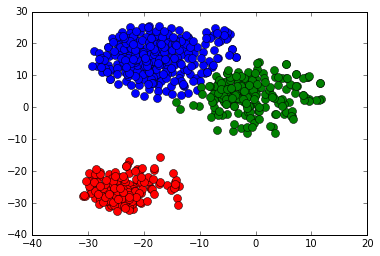

In [12]:
# IPython Notebook plot 
%matplotlib inline

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

ts = TSNE(2)
reduced_vecs = ts.fit_transform(np.concatenate((meat_vecs, dessert_vecs, sauce_vecs)))

#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(meat_vecs):
        #food words colored blue
        color = 'b'
    elif i >= len(meat_vecs) and i < (len(meat_vecs) + len(dessert_vecs)):
        #sports words colored red
        color = 'r'
    else:
        #weather words colored green
        color = 'g'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, markersize=8)

In [104]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(3)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(3)])
print type(reduced_vecs)
print reduced_vecs
print reduced_vecs.shape
print '------------------------------------------------------------------------------------'
# print type(x)
# print x
# print x.shape
print '------------------------------------------------------------------------------------'
print type(y)
print y
print y.shape

<type 'numpy.ndarray'>
[[-13.06877957  18.59800088]
 [ -3.42583851  15.90579029]
 [-21.11675723  14.65344719]
 ..., 
 [ -4.88877632  11.65518049]
 [ -6.48465308  -1.0977194 ]
 [  0.59764025  -3.61803582]]
(628, 2)
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
<type 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [15]:
#293,142,193
a=np.full((1, 293), 0, dtype=int)
b=np.full((1, 142), 1, dtype=int)
c=np.full((1, 193), 2, dtype=int)


y=np.append(a, b)
y=np.append(y, c)
print y

# np.full((3, 5), 7, dtype=int)
# >> np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])
# array([1, 2, 3, 4, 5, 6, 7, 8, 9])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

In [106]:
def scatter(x, colors,num):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

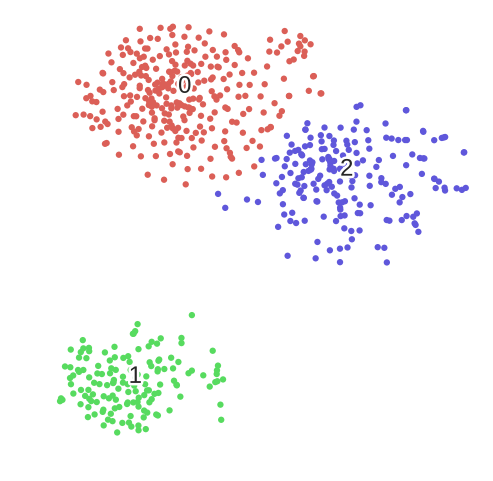

In [107]:
scatter(reduced_vecs, y,3)
plt.savefig('images/word2Vec_tsne-generated.png', dpi=120)

# Visualizing handwritten digits
### Let's first import a few libraries.

In [5]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

### Now we load the classic handwritten digits datasets. It contains 1797 images with \(8*8=64\) pixels each.

In [12]:
digits = load_digits()
digits.data.shape
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

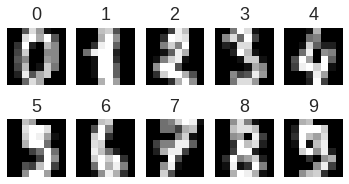

In [7]:
mkdir('./images/')
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('images/digits-generated.png', dpi=150)


### Now let's run the t-SNE algorithm on the dataset. It just takes one line with scikit-learn.

In [14]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(X)

# print type(digits_proj)
# print digits_proj
# print digits_proj.shape

print type(y)
print y
print y.shape

<type 'numpy.ndarray'>
[0 0 0 ..., 9 9 9]
(1797,)


### Here is a utility function used to display the transformed dataset. The color of each point refers to the actual digit (of course, this information was not used by the dimensionality reduction algorithm).

In [9]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### Here is the result.

IndexError: index 537 is out of bounds for axis 0 with size 537

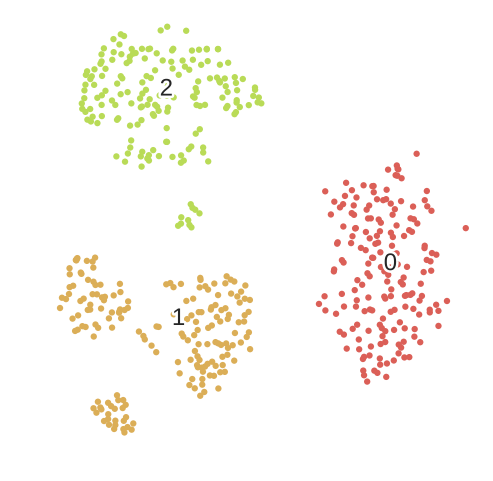

In [97]:
scatter(digits_proj, y)
plt.savefig('images/digits_tsne-generated.png', dpi=120)

# Similarity matrix

### The following function computes the similarity with a constant \(\sigma\).

In [ ]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

### We now compute the similarity with a \(\sigma_i\) depending on the data point (found via a binary search, according to the original t-SNE paper). This algorithm is implemented in the _joint_probabilities private function in scikit-learn's code.


In [89]:

# Pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# Similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# Similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

In [90]:
### We can now display the distance matrix of the data points, and the similarity matrix with both a constant and variable sigma.

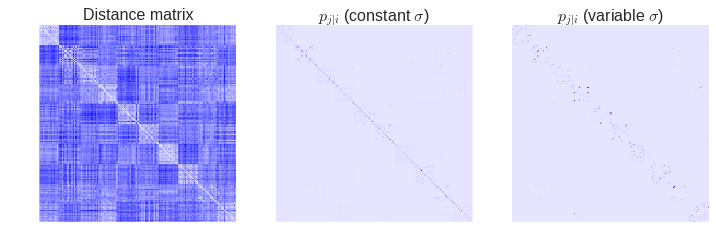

In [111]:
plt.figure(figsize=(12, 4))
pal = sns.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 16})

plt.subplot(133)
plt.imshow(P_binary_s[::10, ::10], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 16})
plt.savefig('images/similarity-generated.png', dpi=120)

In [112]:
### Algorithm

In [113]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, n_iter_without_progress=30,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error < best_error:
            best_error = error
            best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        if min_grad_norm >= grad_norm:
            break
        if min_error_diff >= error_diff:
            break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [114]:
### Let's run the algorithm again, but this time saving all intermediate positions.



In [115]:
X_proj = TSNE(random_state=RS).fit_transform(X)
X_iter = np.dstack(position.reshape(-1, 2)
                   for position in positions)


TypeError: _gradient_descent() got an unexpected keyword argument 'n_iter_check'

In [ ]:
### We create an animation using MoviePy.

In [ ]:
f, ax, sc, txts = scatter(X_iter[..., -1], y)

def make_frame_mpl(t):
    i = int(t*40)
    x = X_iter[..., i]
    sc.set_offsets(x)
    for j, txt in zip(range(10), txts):
        xtext, ytext = np.median(x[y == j, :], axis=0)
        txt.set_x(xtext)
        txt.set_y(ytext)
    return mplfig_to_npimage(f)

animation = mpy.VideoClip(make_frame_mpl,
                          duration=X_iter.shape[2]/40.)
animation.write_gif("images/animation.gif", fps=20)

ValueError: need at least one array to concatenate

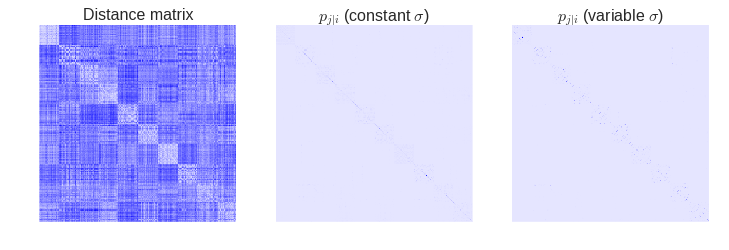

In [122]:
### 自己的資料程式碼
#293,142,193
a=np.full((1, 293), 0, dtype=int)
b=np.full((1, 142), 1, dtype=int)
c=np.full((1, 193), 2, dtype=int)


y=np.append(a, b)
y=np.append(y, c)


plt.figure(figsize=(12, 4))
pal = sns.light_palette("blue", as_cmap=True)

plt.subplot(131)
plt.imshow(D[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("Distance matrix", fontdict={'fontsize': 16})

plt.subplot(132)
plt.imshow(P_constant[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (constant $\sigma$)", fontdict={'fontsize': 16})

plt.subplot(133)
plt.imshow(P_binary_s[::3, ::3], interpolation='none', cmap=pal)
plt.axis('off')
plt.title("$p_{j|i}$ (variable $\sigma$)", fontdict={'fontsize': 16})
plt.savefig('images/similarity-generated.png', dpi=120)
#更改
#X_proj = TSNE(random_state=RS).fit_transform(X)
X_proj = reduced_vecs
X_iter = np.dstack(position.reshape(-1, 2)  for position in positions)


f, ax, sc, txts = scatter(X_iter[..., -1], y)

def make_frame_mpl(t):
    i = int(t*40)
    x = X_iter[..., i]
    sc.set_offsets(x)
    for j, txt in zip(range(3), txts):
        xtext, ytext = np.median(x[y == j, :], axis=0)
        txt.set_x(xtext)
        txt.set_y(ytext)
    return mplfig_to_npimage(f)

animation = mpy.VideoClip(make_frame_mpl,
                          duration=X_iter.shape[2]/40.)
animation.write_gif("images/animation.gif", fps=20)
